In [1]:
#!pip install pygwalker
#!pip install ipywidgets
#!jupyter nbextension enable --py widgetsnbextension

In [2]:
#Import all the necessary libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pygwalker as pyg

In [3]:
#loading data
df=pd.read_csv("popularity.csv")
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  int64  
 2    n_tokens_title                 39644 non-null  int64  
 3    n_tokens_content               39644 non-null  int64  
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  int64  
 8    num_self_hrefs                 39644 non-null  int64  
 9    num_imgs                       39644 non-null  int64  
 10   num_videos                     39644 non-null  int64  
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [5]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [6]:
df.shape

(39644, 61)

In [7]:
df.url.nunique()

39644

## Missing Value in any column?

In [8]:
df.isnull().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

## Total how many columns has missing value?

In [9]:
df.isnull().any().sum()

0

## Are there duplicate values?

In [ ]:
df.duplicated()

In [10]:
df.duplicated().sum()

0

## Removing space from column name

In [11]:
df.columns = df.columns.str.strip()
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

## How is the correlation between cols?

In [12]:
df.corr(numeric_only=True)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,...,0.054772,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745,0.008662
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,...,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,...,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,...,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,...,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443
n_non_stop_unique_tokens,0.003805,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,...,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342,0.000114
num_hrefs,-0.000832,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,...,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.045404
num_self_hrefs,0.064530,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,...,-0.072648,0.189922,-0.058222,-0.122071,0.039153,-0.011239,0.026224,0.008961,-0.006709,-0.001900
num_imgs,-0.027636,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,...,-0.024683,0.155232,-0.072500,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307,0.039388
num_videos,0.000936,0.051460,0.103699,-0.000597,-0.000899,-0.000963,0.114518,0.077458,-0.067336,1.000000,...,-0.010103,0.125659,-0.115976,-0.138190,0.027251,0.061028,0.021980,-0.021982,0.055231,0.023936


## Creating new column from url column

In [13]:
from urllib.parse import urlparse
url='http://mashable.com/2013/01/07/amazon-instant-video-browser/' 
parsed_url = urlparse(url) 
print(parsed_url)
domain = f"{parsed_url.scheme}://{parsed_url.netloc}" # 'http://mashable.com' 

ParseResult(scheme='http', netloc='mashable.com', path='/2013/01/07/amazon-instant-video-browser/', params='', query='', fragment='')


In [14]:
import pandas as pd
from urllib.parse import urlparse
from datetime import datetime

# Sample DataFrame
#df = pd.DataFrame({'url': ['http://mashable.com/2013/01/07/amazon-instant-video-browser/']})

# Function to extract required components
def extract_url_components(url):
    parsed_url = urlparse(url)  
    domain = f"{parsed_url.scheme}://{parsed_url.netloc}"  # Extracting domain
    path_parts = parsed_url.path.strip('/').split('/')  # Extracting parts of the path
    
    if len(path_parts) >= 4:  
        year, month, day, slug = path_parts[:4]  # Extracting year, month, day, and slug
        date_str = f"{year}-{month}-{day}"  # Formatting the date
        day_of_week = datetime.strptime(date_str, "%Y-%m-%d").strftime('%A')  # Getting day of the week
    else:
        year, month, day, slug, day_of_week = None, None, None, None, None  # Handle missing values

    return pd.Series([domain, year, month, day, slug, day_of_week])

# Apply function to extract components
df[['domain', 'year', 'month', 'day', 'slug', 'day_of_week']] = df['url'].apply(extract_url_components)

# Reorder columns: bring extracted ones to the front
new_column_order = ['domain', 'year', 'month', 'day', 'slug', 'day_of_week'] + [col for col in df.columns if col not in ['domain', 'year', 'month', 'day', 'slug', 'day_of_week' ,'url']]
df = df[new_column_order]
df

,domain,year,month,day,slug,day_of_week,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com,2013,01,07,amazon-instant-video-browser,Monday,731,12,219,0.663594,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com,2013,01,07,ap-samsung-sponsored-tweets,Monday,731,9,255,0.604743,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com,2013,01,07,apple-40-billion-app-downloads,Monday,731,9,211,0.575130,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com,2013,01,07,astronaut-notre-dame-bcs,Monday,731,9,531,0.503788,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com,2013,01,07,att-u-verse-apps,Monday,731,13,1072,0.415646,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com,2014,12,27,samsung-app-autism,Saturday,8,11,346,0.529052,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com,2014,12,27,seth-rogen-james-franco-will-live-tweet-the-in...,Saturday,8,12,328,0.696296,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com,2014,12,27,son-pays-off-mortgage,Saturday,8,10,442,0.516355,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com,2014,12,27,ukraine-blasts,Saturday,8,6,682,0.539493,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [15]:
#from ydata_profiling import ProfileReport

#print(df.info(memory_usage="deep"))
#prof = ProfileReport(df)
#prof.to_file(output_file='output.html')
#print(df.info(memory_usage="deep"))

## Numerical Data -- As this DF has numrical data only

### Histogram -- Year wise count

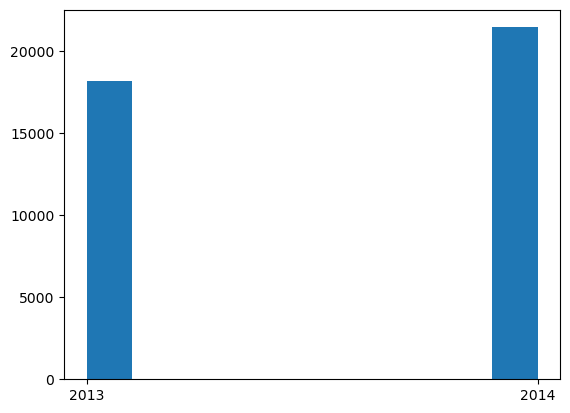

In [16]:
plt.hist(df['year'])
#plt.xlim(min(df['shares']), max(df['shares'])) 
plt.show()

### Matplotlib Histogram -- Day wise count

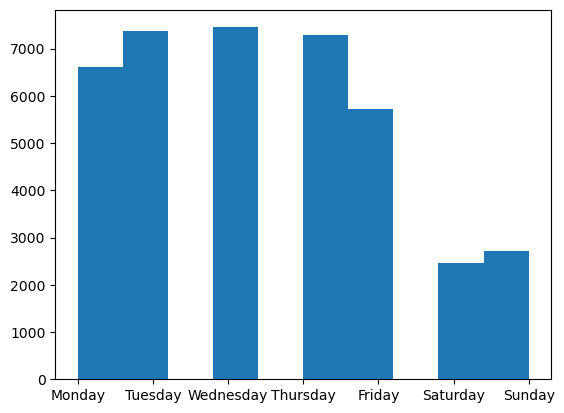

In [17]:
day_wise_count = df['day_of_week'].value_counts()
plt.hist(df['day_of_week'])
#plt.xlim(min(df['shares']), max(df['shares'])) 
plt.show()

### Seaborn Histogram -- Day wise count

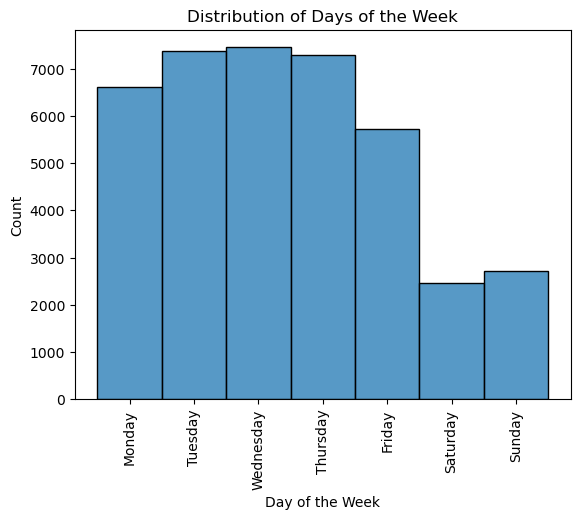

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['day_of_week'])  # Analyzing age distribution
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.title("Distribution of Days of the Week")

plt.show()

## Matplotlib bar chart

<BarContainer object of 7 artists>

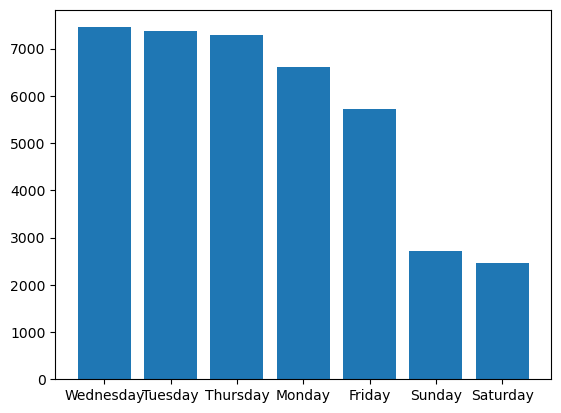

In [19]:
day_wise_count = df['day_of_week'].value_counts()
plt.bar(day_wise_count.index, day_wise_count.values)

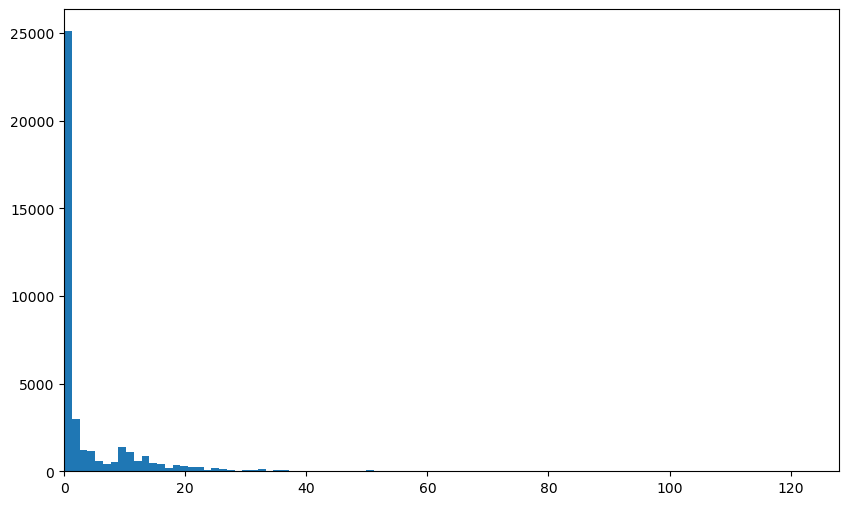

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df['num_imgs'],bins=100)
plt.xlim(min(df['num_imgs']), max(df['num_imgs'])) 
plt.show()

<Axes: ylabel='Density'>

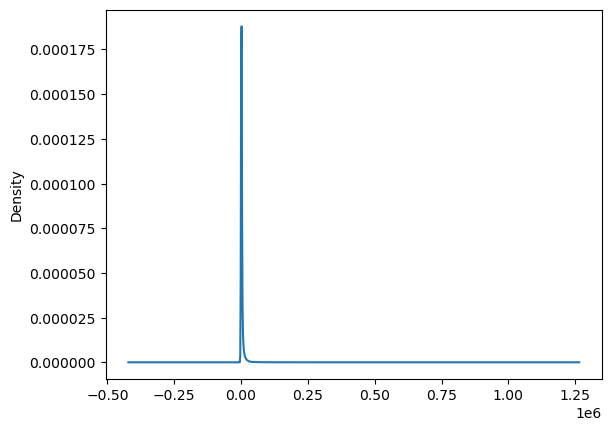

In [21]:
df.shares.plot(kind='kde')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10440\1744234517.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['shares'])


<Axes: xlabel='shares', ylabel='Density'>

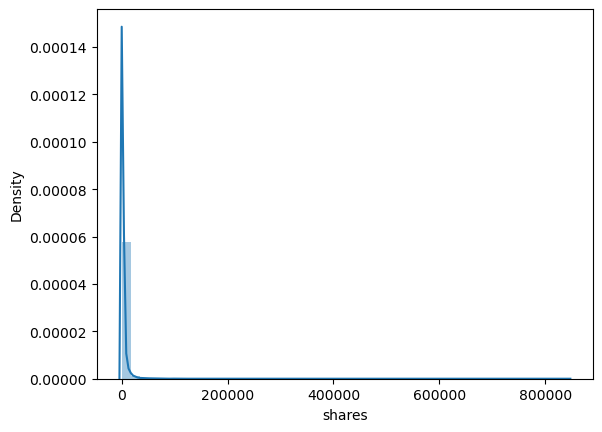

In [22]:
sns.distplot(df['shares'])

<Axes: ylabel='shares'>

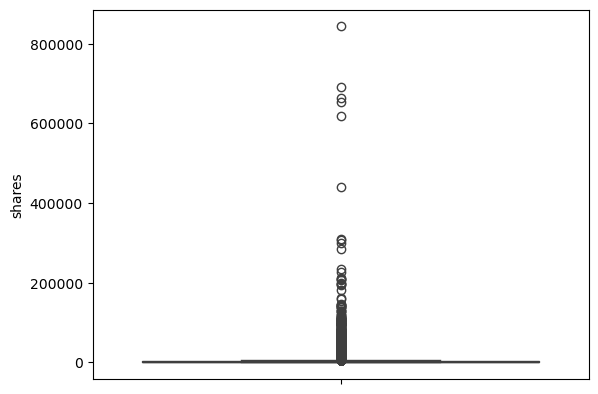

In [23]:
sns.boxplot(df['shares'])

In [24]:
df.shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

## Observation : lot of outlier 

In [25]:
pyg.walk(df, return_html=True)
walker = pyg.walk(df)

Box(children=(HTML(value='\n<div id="ifr-pyg-00062f40144f8c72kuvRdWD4hUy6BCTV" style="height: auto">\n    <hea…

Box(children=(HTML(value='\n<div id="ifr-pyg-00062f401465a810j4LHGq6df5DZYoxW" style="height: auto">\n    <hea…

# Bivariate

## Seaborn Bar Plot : Share Distribution Vs. Month For 2013 & 2024 (hue)

<Axes: xlabel='month', ylabel='shares'>

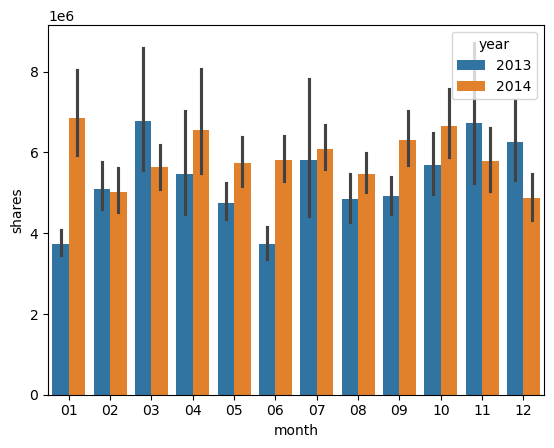

In [26]:
# if you do not use , any estimator like sum, it will give you count for sum , estimator=sum and it operates on y axis value
sns.barplot(data=df,x='month',y='shares',hue='year', estimator=sum)

## Seaborn Bar Plot : Share Distribution Vs. Week Days For 2013 & 2024 (hue)

<Axes: xlabel='day_of_week', ylabel='shares'>

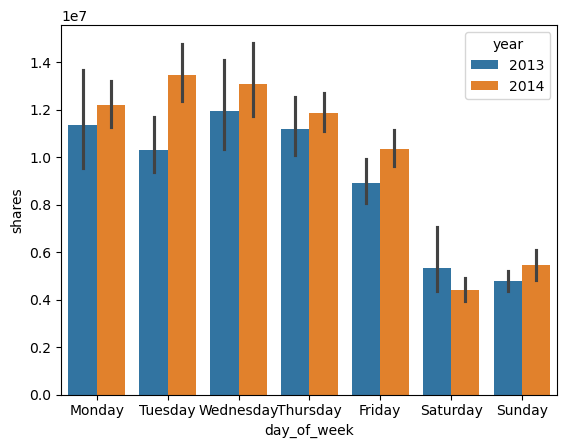

In [27]:
# if you do not use , any estimator like sum, it will give you count for sum , estimator=sum and it operates on y axis value
sns.barplot(data=df,x='day_of_week',y='shares',hue='year', estimator=sum)

## Seaborn Line Plot : Share Distribution Vs. Month For 2013 & 2024 (hue)

In [28]:
grouped_df = df.groupby(['year', 'month'])['shares'].sum().reset_index()
grouped_df = grouped_df.rename(columns={'shares': 'total_shares'})
print(grouped_df)

    year month  total_shares
0   2013    01       3737039
1   2013    02       5102163
2   2013    03       6776794
3   2013    04       5460238
4   2013    05       4754275
5   2013    06       3736811
6   2013    07       5822835
7   2013    08       4836924
8   2013    09       4916442
9   2013    10       5688922
10  2013    11       6719258
11  2013    12       6264105
12  2014    01       6861702
13  2014    02       5009343
14  2014    03       5631574
15  2014    04       6559941
16  2014    05       5742603
17  2014    06       5816413
18  2014    07       6093999
19  2014    08       5467589
20  2014    09       6306321
21  2014    10       6650780
22  2014    11       5778918
23  2014    12       4871463


<Axes: xlabel='month', ylabel='total_shares'>

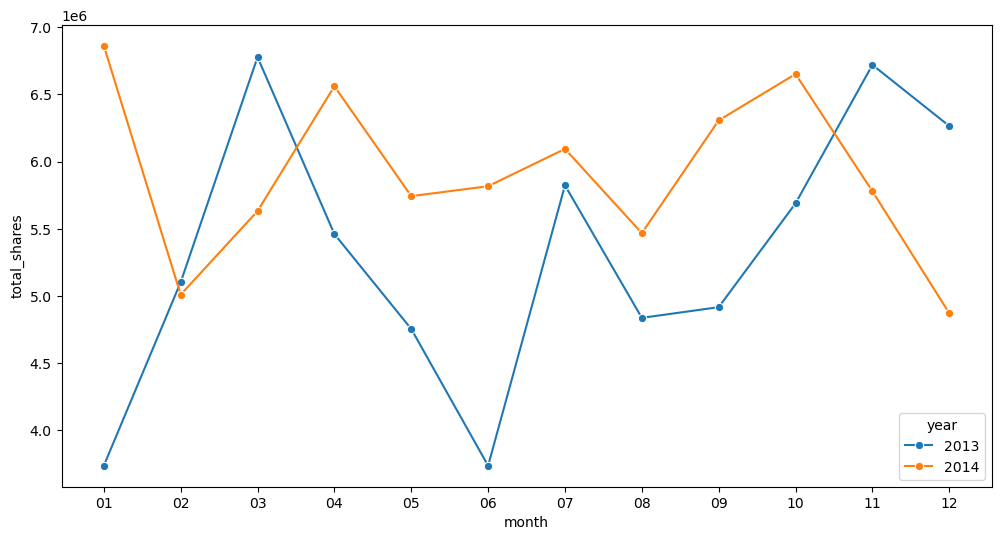

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Line plot with separate Year & Month
plt.figure(figsize=(12, 6))
sns.lineplot(x=grouped_df['month'], y=grouped_df['total_shares'], hue=grouped_df['year'], marker='o')

# Business Type wise share distribution

##  Data Preparation :  Business Type wise share distribution

In [30]:
df_share_by_bustype = df[['data_channel_is_lifestyle', 'data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world','year','month','day','day_of_week','shares']]
df_share_by_bustype	 	 	 


,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,year,month,day,day_of_week,shares
0,0,1,0,0,0,0,2013,01,07,Monday,593
1,0,0,1,0,0,0,2013,01,07,Monday,711
2,0,0,1,0,0,0,2013,01,07,Monday,1500
3,0,1,0,0,0,0,2013,01,07,Monday,1200
4,0,0,0,0,1,0,2013,01,07,Monday,505
...,...,...,...,...,...,...,...,...,...,...,...
39639,0,0,0,0,1,0,2014,12,27,Saturday,1800
39640,0,0,0,1,0,0,2014,12,27,Saturday,1900
39641,0,0,0,0,0,0,2014,12,27,Saturday,1900
39642,0,0,0,0,0,1,2014,12,27,Saturday,1100


##  Data Preparation :  Deriving Business Type column ('bus_type') from  different "data_channel_is_xxx" columns Vs. Shares

In [33]:
df_share_by_bustype = df[['data_channel_is_lifestyle', 'data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world','year','month','day','day_of_week','shares']]
#df_share_by_bustype	

df_share_by_bustype_groupby = df_share_by_bustype.groupby(['data_channel_is_lifestyle', 'data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world','year','month','day','day_of_week'])['shares'].sum().reset_index()
df_share_by_bustype_groupby = df_share_by_bustype_groupby.rename(columns={'shares': 'total_shares'})

# Mapping column names to category labels
category_mapping = {
    'data_channel_is_lifestyle': 'lifestyle',
    'data_channel_is_entertainment': 'entertainment',
    'data_channel_is_bus': 'business',
    'data_channel_is_socmed': 'social_media',
    'data_channel_is_tech': 'tech',
    'data_channel_is_world': 'world'
}



# Find the column with value 1.0 and assign its name to 'bus_type'
# iloc[:, :-5] selects all rows (:) and all columns except the last five (:-5).
df_share_by_bustype_groupby['bus_type'] = df_share_by_bustype_groupby.iloc[:, :-5].idxmax(axis=1).map(category_mapping)

# Assign "others" where all business type flags are 0
# List of data channel columns
data_channel_columns = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 
                        'data_channel_is_bus', 'data_channel_is_socmed', 
                        'data_channel_is_tech', 'data_channel_is_world']

# Update 'bus_type' to 'others' where all values in data_channel_columns are 0
df_share_by_bustype_groupby.loc[df_share_by_bustype_groupby[data_channel_columns].sum(axis=1) == 0, 'bus_type'] = 'others'

# Drop the original data_channel columns
df_share_by_bustype_groupby_all = df_share_by_bustype_groupby[['bus_type', 'total_shares','year','month','day','day_of_week']]
df_share_by_bustype_groupby_day = df_share_by_bustype_groupby[['bus_type', 'total_shares','day_of_week']]
df_share_by_bustype_groupby_year = df_share_by_bustype_groupby[['bus_type', 'total_shares','year']]
df_share_by_bustype_groupby_mon = df_share_by_bustype_groupby[['bus_type', 'total_shares','month']]

#df_share_by_bustype_groupby[df_share_by_bustype_groupby['bus_type'] == 'lifestyle']
df_share_by_bustype_groupby_mon.head()

,bus_type,total_shares,month
0,others,26857,01
1,others,2400,01
2,others,60319,01
3,others,30517,01
4,others,36822,01


In [34]:
## Seaborn Bar Plot : Share Distributionm(y axis) Across Business Type (x axis) For Different Years (hue)

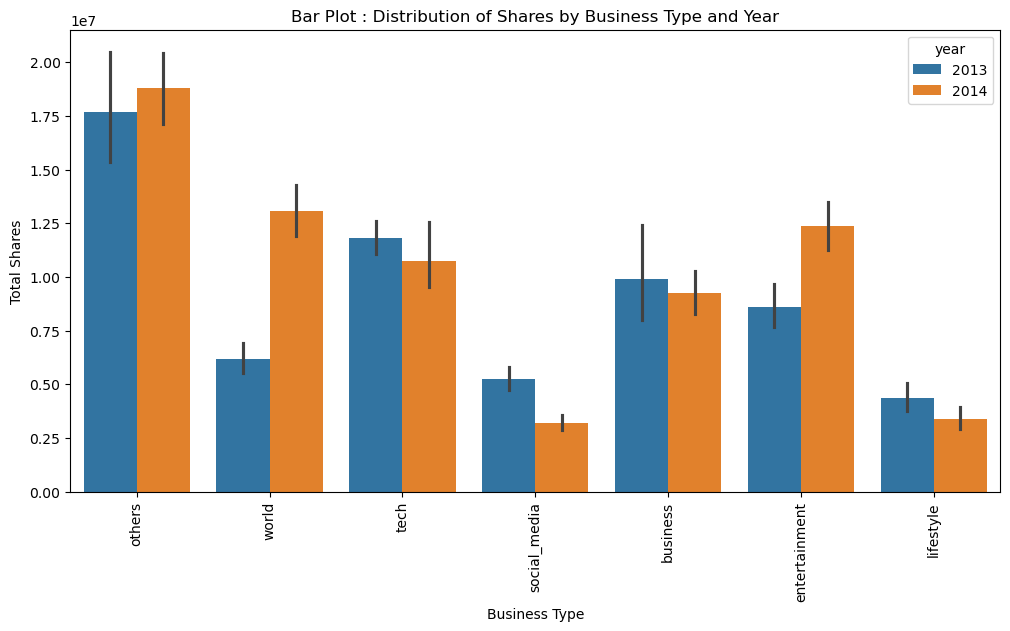

In [35]:
plt.figure(figsize=(12,6))  # Adjust figure size

# if you do not use , any estimator like sum, it will give you count for sum , estimator=sum and it operates on y axis value
sns.barplot(data=df_share_by_bustype_groupby,x='bus_type',y='total_shares',hue='year', estimator=sum)
plt.xticks(rotation=90)  # Rotate x-axis tick labels vertically

plt.xlabel("Business Type")
plt.ylabel("Total Shares")
plt.title("Bar Plot : Distribution of Shares by Business Type and Year")
plt.show()

In [36]:
df_share_by_bustype_groupby

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,year,month,day,day_of_week,total_shares,bus_type
0,0,0,0,0,0,0,2013,01,07,Monday,26857,others
1,0,0,0,0,0,0,2013,01,08,Tuesday,2400,others
2,0,0,0,0,0,0,2013,01,09,Wednesday,60319,others
3,0,0,0,0,0,0,2013,01,10,Thursday,30517,others
4,0,0,0,0,0,0,2013,01,11,Friday,36822,others
...,...,...,...,...,...,...,...,...,...,...,...,...
4861,1,0,0,0,0,0,2014,12,23,Tuesday,4000,lifestyle
4862,1,0,0,0,0,0,2014,12,24,Wednesday,8100,lifestyle
4863,1,0,0,0,0,0,2014,12,25,Thursday,3200,lifestyle
4864,1,0,0,0,0,0,2014,12,26,Friday,3378,lifestyle


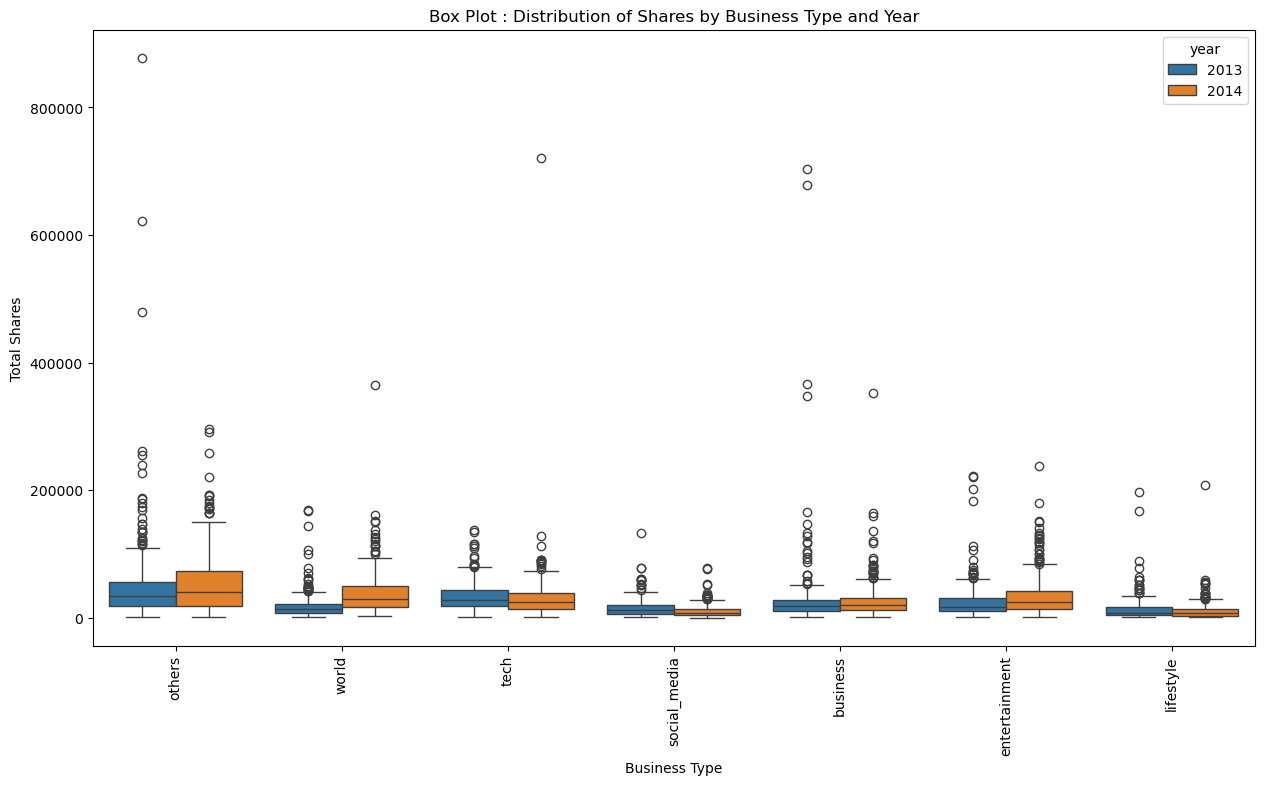

In [37]:
plt.figure(figsize=(15,8))  # Adjust figure size
sns.boxplot(data=df_share_by_bustype_groupby, x='bus_type',y='total_shares',hue='year')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.xlabel("Business Type")
plt.ylabel("Total Shares")
plt.title("Box Plot : Distribution of Shares by Business Type and Year")
plt.show()

## Data Preparation : Deriving Business Type column ('bus_type') from  different "data_channel_is_xxx" columns Vs. Shares Vs. Week Days

In [38]:
# Drop the original data_channel columns
df_share_by_bustype_groupby_day = df_share_by_bustype_groupby_day[['bus_type', 'total_shares','day_of_week']]

df_share_by_bustype_groupby_day

,bus_type,total_shares,day_of_week
0,others,26857,Monday
1,others,2400,Tuesday
2,others,60319,Wednesday
3,others,30517,Thursday
4,others,36822,Friday
...,...,...,...
4861,lifestyle,4000,Tuesday
4862,lifestyle,8100,Wednesday
4863,lifestyle,3200,Thursday
4864,lifestyle,3378,Friday


In [39]:
print(df_share_by_bustype_groupby_day.columns)
print(df_share_by_bustype_groupby_day.dtypes)

Index(['bus_type', 'total_shares', 'day_of_week'], dtype='object')
bus_type        object
total_shares     int64
day_of_week     object
dtype: object


## Seaborn Line Plot : Share Distribution (y axis) By Business Type (hue) Across Week Days (x axis)

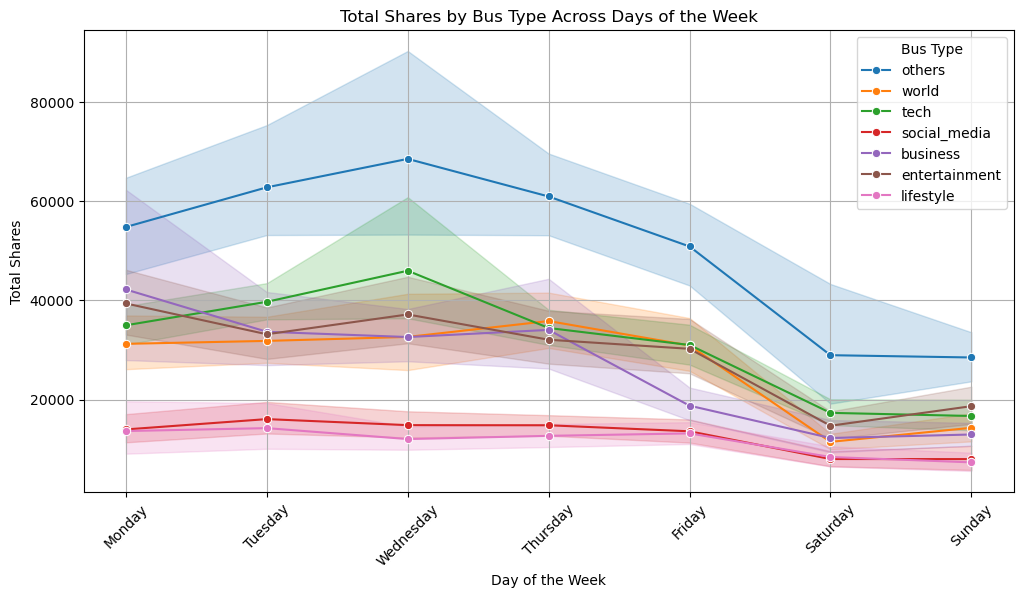

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define correct order for days of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df_share_by_bustype_groupby_day, 
    x='day_of_week', 
    y='total_shares', 
    hue='bus_type',  
    marker='o'
)

# Set x-axis order
plt.xticks(ticks=range(len(day_order)), labels=day_order, rotation=45)

# Formatting
plt.xlabel("Day of the Week")
plt.ylabel("Total Shares")
plt.title("Total Shares by Bus Type Across Days of the Week")
plt.legend(title="Bus Type")
plt.grid(True)

# Show the plot
plt.show()

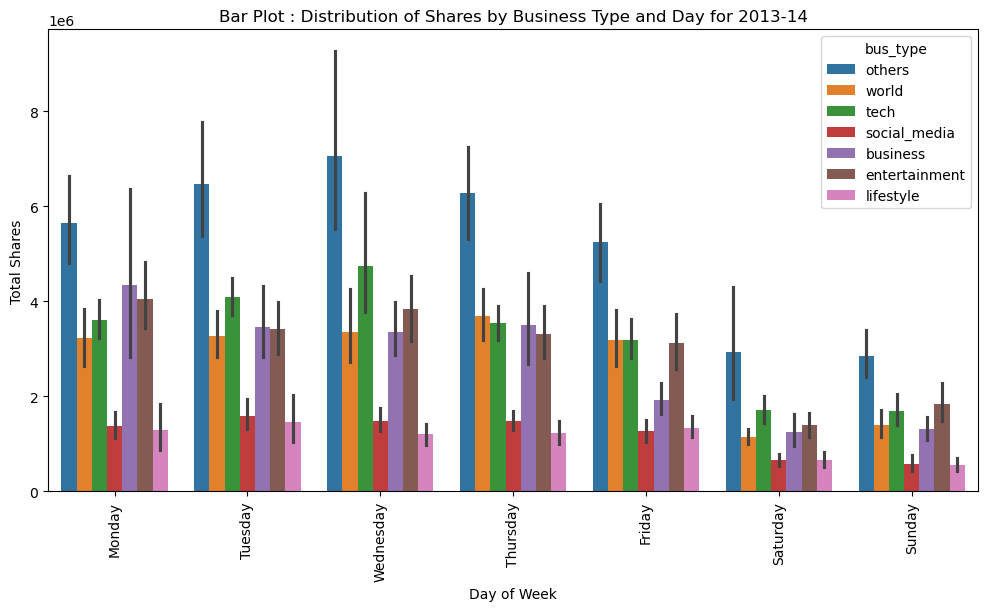

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_share_by_bustype_groupby,x='day_of_week',y='total_shares',hue='bus_type', estimator=sum)
plt.xticks(rotation=90)  # Rotate x-axis tick labels vertically

plt.xlabel("Day of Week")
plt.ylabel("Total Shares")
plt.title("Bar Plot : Distribution of Shares by Business Type and Day for 2013-14")
plt.show()

## Seaborn Line Plot : Share Distribution (y axis) By Business Type (hue)  Across Months (x axis)

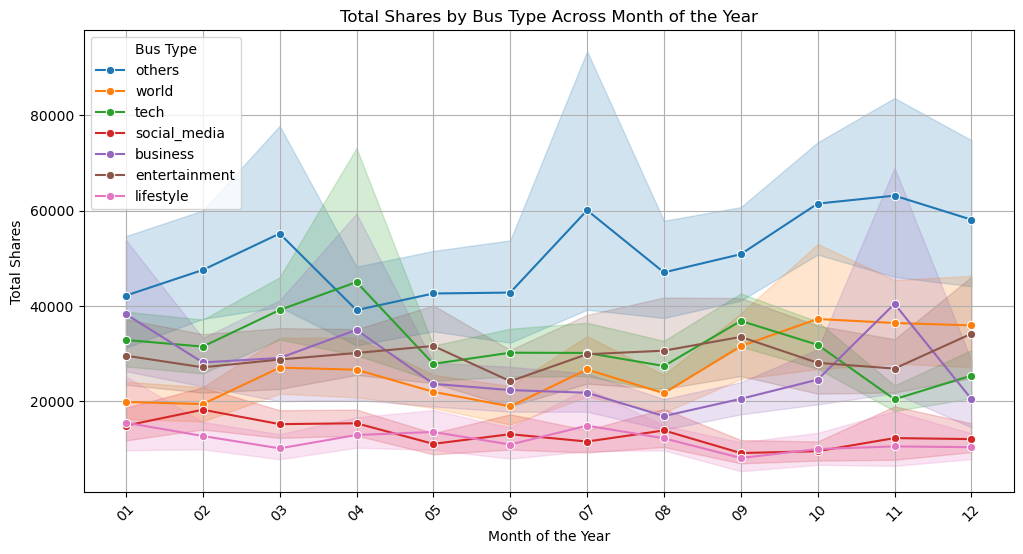

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define correct order for days of the week
day_order = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df_share_by_bustype_groupby_mon, 
    x='month', 
    y='total_shares', 
    hue='bus_type',  
    marker='o'
)

# Set x-axis order
plt.xticks(ticks=range(len(day_order)), labels=day_order, rotation=45)

# Formatting
plt.xlabel("Month of the Year")
plt.ylabel("Total Shares")
plt.title("Total Shares by Bus Type Across Month of the Year")
plt.legend(title="Bus Type")
plt.grid(True)

# Show the plot
plt.show()

## Number of Shares at Specific Percentile

In [43]:
percentile_78 = np.percentile(df['shares'], 78)
print(f"78th Percentile of Shares: {percentile_78}")

78th Percentile of Shares: 3100.0


## Between Which Percentile Share Mean resides

In [44]:
import numpy as np
import scipy.stats as stats

# Compute Mean
mean_shares = df['shares'].mean()

# Compute Percentile Rank of the Mean
percentile_rank = stats.percentileofscore(df['shares'], mean_shares)

# Round to nearest 10 for interpretation
lower_percentile = (percentile_rank // 10) * 10
upper_percentile = lower_percentile + 10

print(f"The mean number of shares lies between the {lower_percentile}th and {upper_percentile}th percentiles.")

The mean number of shares lies between the 70.0th and 80.0th percentiles.


## removing data by specifying lower and upper percentile

In [ ]:
#cols = ['col_1', 'col_2'] # one or more
cols = ['shares']
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df_percentile = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

## removing data beyond 95 percentile

In [45]:
import numpy as np

# Find the 95th percentile value of shares
percentile_95 = np.percentile(df['shares'], 95)

# Filter dataset to remove outliers beyond the 95th percentile
df_filtered = df[df['shares'] <= percentile_95]

print(f"Articles beyond {percentile_95} shares are removed. New dataset size: {df_filtered.shape[0]}")

Articles beyond 10800.0 shares are removed. New dataset size: 37663


In [46]:
df.shape[0]

39644

In [47]:
mean_shares = df_filtered['shares'].mean()
print(mean_shares)

2074.334386533202


In [48]:
std_shares = df_filtered['shares'].std()  # Default computes sample standard deviation
print(f"Standard Deviation of Shares: {std_shares:.2f}")

Standard Deviation of Shares: 1871.81


In [49]:
(39644-37663)/39644

0.04996973060236101

## Working With Census Data

In [55]:
#loading data
df_census=pd.read_csv("EDA_census.csv")
df_census.head()

,table_name,state_code,dist_code,area_name,tot_rur_urb,age_grp,tot_per,tot_male,tot_fem,tot_per_ill,tot_male_ill,tot_fem_ill,tot_per_lit,tot_male_lit,tot_fem_lit
0,C2308,0,0,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,188506636,258709529,763638812,434763622,328875190
1,C2308,0,0,INDIA,Total,0-6,164515253,85752254,78762999,164515253,85752254,78762999,0,0,0
2,C2308,0,0,INDIA,Total,7,24826640,12903364,11923276,6748214,3388683,3359531,18078426,9514681,8563745
3,C2308,0,0,INDIA,Total,8,26968373,14061937,12906436,4131414,2013742,2117672,22836959,12048195,10788764
4,C2308,0,0,INDIA,Total,9,23424638,12214985,11209653,2491904,1198339,1293565,20932734,11016646,9916088


### create a new column to label the age_grp like 0-6=6, 7 to 19 as it is, 20-24 = 24, 25-29=29..and 80+=80 and Age not stated=0 , All ages =100

In [56]:
def label_age(age):
    if age == "0-6":
        return 6
    elif age.isdigit():
        return int(age)  # Keep ages 7-19 as is
    elif age == "20-24":
        return 24
    elif age == "25-29":
        return 29
    elif age == "30-34":
        return 34
    elif age == "35-39":
        return 39
    elif age == "40-44":
        return 44
    elif age == "45-49":
        return 49
    elif age == "50-54":
        return 54
    elif age == "55-59":
        return 59
    elif age == "60-64":
        return 64
    elif age == "65-69":
        return 69
    elif age == "70-74":
        return 74
    elif age == "75-79":
        return 79
    elif age == "80+":
        return 80
    elif age == "Age not stated":
        return 0
    elif age == "All ages":
        return 100
    else:
        return None  # Handle unexpected values

df_census["age_label"] = df_census["age_grp"].apply(label_age)

df_census.head()

,table_name,state_code,dist_code,area_name,tot_rur_urb,age_grp,tot_per,tot_male,tot_fem,tot_per_ill,tot_male_ill,tot_fem_ill,tot_per_lit,tot_male_lit,tot_fem_lit,age_label
0,C2308,0,0,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,188506636,258709529,763638812,434763622,328875190,100
1,C2308,0,0,INDIA,Total,0-6,164515253,85752254,78762999,164515253,85752254,78762999,0,0,0,6
2,C2308,0,0,INDIA,Total,7,24826640,12903364,11923276,6748214,3388683,3359531,18078426,9514681,8563745,7
3,C2308,0,0,INDIA,Total,8,26968373,14061937,12906436,4131414,2013742,2117672,22836959,12048195,10788764,8
4,C2308,0,0,INDIA,Total,9,23424638,12214985,11209653,2491904,1198339,1293565,20932734,11016646,9916088,9


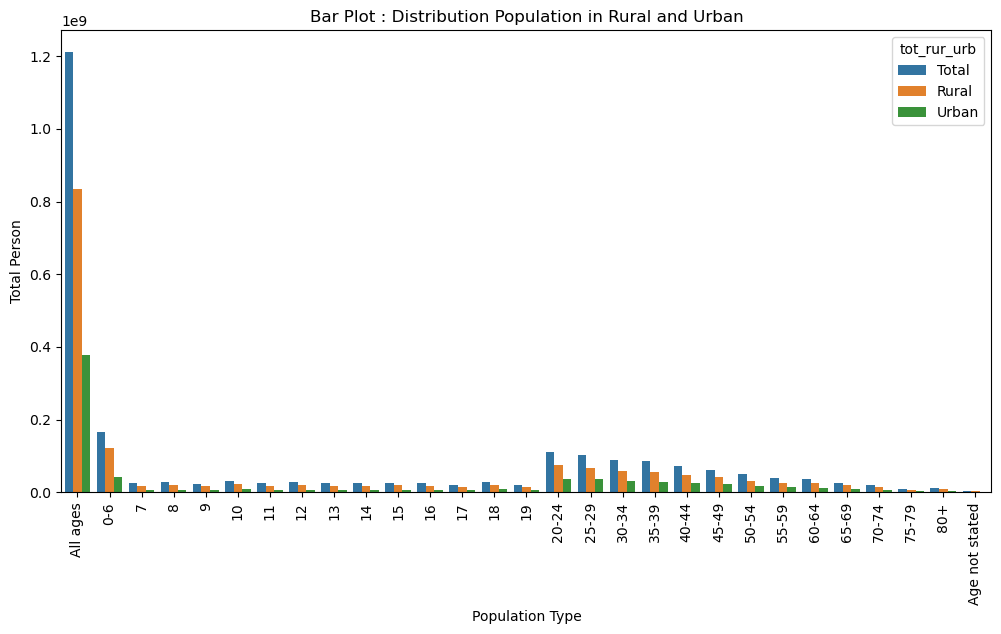

In [62]:
plt.figure(figsize=(12,6))  # Adjust figure size
#df_census[df_census['area_name'] == 'INDIA']
# if you do not use , any estimator like sum, it will give you count for sum , estimator=sum and it operates on y axis value
sns.barplot(data=df_census[df_census['area_name'] == 'INDIA'], x='age_grp',y='tot_per',hue='tot_rur_urb', estimator=sum)
plt.xticks(rotation=90)  # Rotate x-axis tick labels vertically

plt.xlabel("Population Type")
plt.ylabel("Total Person")
plt.title("Bar Plot : Distribution Total Population in Rural and Urban")
plt.show()

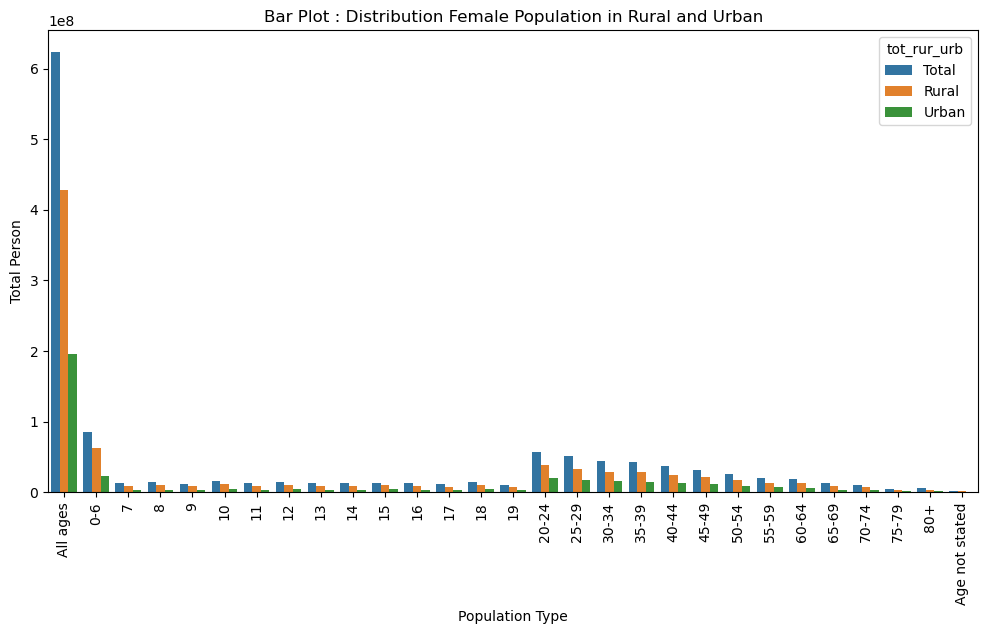

In [64]:
plt.figure(figsize=(12,6))  # Adjust figure size
#df_census[df_census['area_name'] == 'INDIA']
# if you do not use , any estimator like sum, it will give you count for sum , estimator=sum and it operates on y axis value
sns.barplot(data=df_census[df_census['area_name'] == 'INDIA'], x='age_grp',y='tot_male',hue='tot_rur_urb', estimator=sum)
plt.xticks(rotation=90)  # Rotate x-axis tick labels vertically

plt.xlabel("Population Type")
plt.ylabel("Total Person")
plt.title("Bar Plot : Distribution Female Population in Rural and Urban")
plt.show()

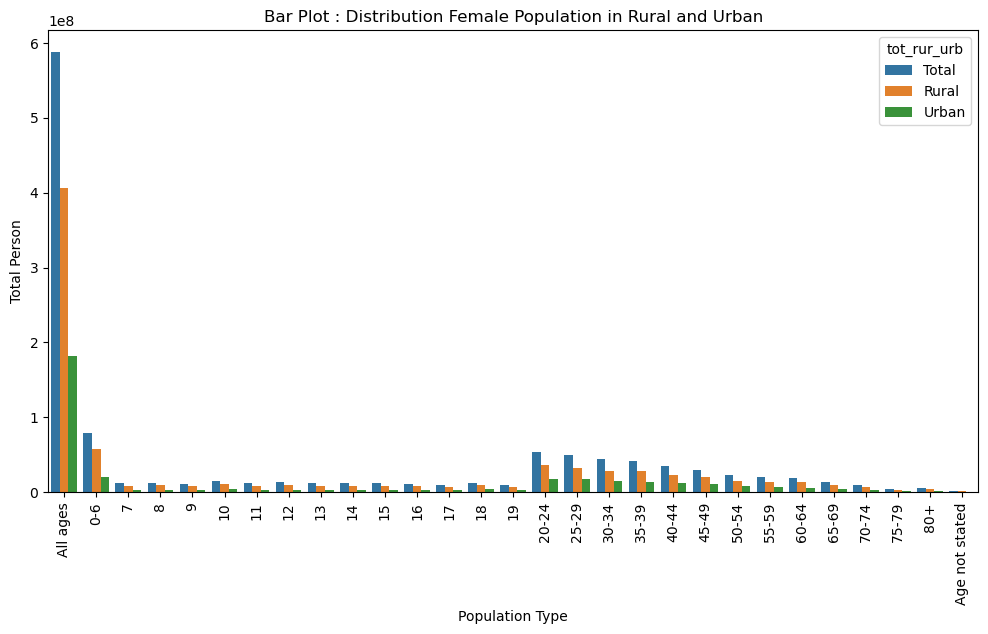

In [63]:
plt.figure(figsize=(12,6))  # Adjust figure size
#df_census[df_census['area_name'] == 'INDIA']
# if you do not use , any estimator like sum, it will give you count for sum , estimator=sum and it operates on y axis value
sns.barplot(data=df_census[df_census['area_name'] == 'INDIA'], x='age_grp',y='tot_fem',hue='tot_rur_urb', estimator=sum)
plt.xticks(rotation=90)  # Rotate x-axis tick labels vertically

plt.xlabel("Population Type")
plt.ylabel("Total Person")
plt.title("Bar Plot : Distribution Female Population in Rural and Urban")
plt.show()

In [65]:
# Filtering data where 'tot_rur_urb' is either 'Rural' or 'Urban'
df_filtered = df_census[df_census['tot_rur_urb'].isin(['Rural', 'Urban'])]

# Calculating the average for total male and female population grouped by Rural and Urban
avg_population = df_filtered.groupby('tot_rur_urb')[['tot_male', 'tot_fem']].mean()

# Displaying the result
print(avg_population)

                 tot_male       tot_fem
tot_rur_urb                            
Rural        1.639008e+06  1.555432e+06
Urban        7.490008e+05  6.958503e+05


In [67]:
# Filtering data for area_name = 'INDIA' and age_label = 24
df_filtered = df_census[(df_census['area_name'] == 'INDIA') & (df_census['age_label'] == 24)]

# Calculating the percentage of illiterate females
if not df_filtered.empty:
    female_ill_percentage = (df_filtered['tot_fem_ill'].sum() / df_filtered['tot_fem'].sum()) * 100
    print(f"Percentage of illiterate females in age_label 24 for INDIA: {female_ill_percentage:.2f}%")
else:
    print("No data available for the given conditions.")

Percentage of illiterate females in age_label 24 for INDIA: 22.68%


In [68]:
# Creating a new column for literacy rate
df_census['literacy_rate'] = 100 - ((df_census['tot_per_ill'] / df_census['tot_per']) * 100)

# Grouping by age_label and calculating the literacy rate for each group
literacy_rates = df_census.groupby('age_label')['literacy_rate'].mean().reset_index()

# Displaying the comparison
print(literacy_rates)

    age_label  literacy_rate
0           0      71.214835
1           6       0.000000
2           7      75.426127
3           8      87.493894
4           9      90.782471
5          10      90.847196
6          11      93.456359
7          12      93.830372
8          13      94.479573
9          14      94.054096
10         15      92.872244
11         16      92.728518
12         17      92.737964
13         18      90.430936
14         19      90.736422
15         24      87.926215
16         29      84.084521
17         34      80.435142
18         39      75.797642
19         44      71.513031
20         49      67.960163
21         54      65.138390
22         59      62.293345
23         64      55.004336
24         69      51.593446
25         74      46.346417
26         79      46.382547
27         80      43.399019
28        100      69.099279


In [72]:
# Calculate female literacy rate
df_census['female_lit_rate'] = (df_census['tot_fem_lit'] / df_census['tot_fem']) * 100

# Exclude 'INDIA' and focus on states
df_states = df_census[df_census['area_name'] != 'INDIA']

# Find the state with the highest female literacy rate
highest_female_lit_state = df_states.groupby('area_name')['female_lit_rate'].mean().idxmax()

print(f"The state with the highest female literacy rate is: {highest_female_lit_state}")

The state with the highest female literacy rate is: State - KERALA


In [71]:
# Calculate total literacy rate
df_census['literacy_rate'] = (df_census['tot_per_lit'] / df_census['tot_per']) * 100

# Exclude 'INDIA' and filter for the year 2011 if applicable
df_states = df_census[df_census['area_name'] != 'INDIA']

# Find the state with the lowest literacy rate
lowest_lit_state = df_states.groupby('area_name')['literacy_rate'].mean().idxmin()

print(f"The state with the lowest literacy rate in 2011 is: {lowest_lit_state}")

The state with the lowest literacy rate in 2011 is: State - ARUNACHAL PRADESH


## Working With NAS (Education) Data

In [75]:
#loading data
df_edu=pd.read_csv("nas.csv")
df_edu.head()

,STUID,State,District,Gender,Age,Category,Same.language,Siblings,Handicap,Father.edu,...,express_science_views,watch_TV,read_magazine,read_book,play_games,help_household_work,Maths,Reading,Science,Social
0,26011001001,Maharashtra,1,Girl,13 years,3.0,2.0,1 sibling,No,Illiterate,...,Agree,Every day,Never,Once a month,Once a week,Every day,NaN,33.33,NaN,NaN
1,26011001002,Maharashtra,1,Girl,15 years,3.0,2.0,3 siblings,No,NaN,...,Agree,Once a week,Never,Never,Once a week,Every day,NaN,62.07,NaN,NaN
2,26011001003,Maharashtra,1,Girl,14 years,3.0,2.0,3 siblings,No,Degree & above,...,Agree,Every day,Once a month,Once a month,Once a week,Every day,NaN,41.38,NaN,NaN
3,26011001004,Maharashtra,1,Boy,13 years,3.0,2.0,3 siblings,No,Secondary,...,Agree,Every day,Every day,Never,Every day,Every day,29.82,NaN,NaN,NaN
4,26011001005,Maharashtra,1,Girl,14 years,3.0,2.0,2 siblings,No,Primary,...,Neither,Never,Never,Once a month,Once a week,Every day,NaN,NaN,27.27,NaN


In [76]:
import pandas as pd


# Ensure column names match the dataset
# Assuming "Age" is the column for age and "Maths.." is the column for math marks

# Group by Age and calculate average Math marks
age_group_math_avg = df_edu.groupby("Age")["Maths"].mean()

# Find the age group with the highest average Math marks
highest_math_age_group = age_group_math_avg.idxmax()
highest_math_avg = age_group_math_avg.max()

print(f"Age group with highest Math marks: {highest_math_age_group}, Average Marks: {highest_math_avg}")

Age group with highest Math marks: 12 years, Average Marks: 32.79095890410959


In [77]:
# Filter for children whose mothers are illiterate
illiterate_mothers = df_edu[df_edu["Mother.edu"] == "Illiterate"]

# Count occurrences of each number of siblings
sibling_distribution = illiterate_mothers["Siblings"].value_counts().sort_index()

# Find the most common number of siblings
most_common_siblings = sibling_distribution.idxmax()

# Display results
print("Sibling distribution for children of illiterate mothers:")
print(sibling_distribution)
print(f"\nMost common number of siblings: {most_common_siblings}")

Sibling distribution for children of illiterate mothers:
Siblings
1 sibling       533
2 siblings      923
3 siblings      532
4+ siblings     469
Single child     88
Name: count, dtype: int64

Most common number of siblings: 2 siblings


In [85]:
import pandas as pd

# Load the dataset
df_edu = pd.read_csv("nas.csv")

# Remove students aged 11
df_edu = df_edu[df_edu["Age"] != 11]

# Compute the average science marks grouped by Father's Education and Age
avg_science_marks = df_edu.groupby(["Father.edu", "Age"])["Science"].mean().reset_index()

# Print the results
print(avg_science_marks)

        Father.edu        Age    Science
0   Degree & above   12 years  46.752857
1   Degree & above   13 years  44.805143
2   Degree & above   14 years  42.676944
3   Degree & above   15 years  29.090000
4   Degree & above  16+ years  32.730000
5       Illiterate  11- years        NaN
6       Illiterate   12 years  29.870000
7       Illiterate   13 years  33.758968
8       Illiterate   14 years  35.319478
9       Illiterate   15 years  33.413333
10      Illiterate  16+ years  33.116786
11         Primary  11- years  48.486667
12         Primary   12 years  34.121667
13         Primary   13 years  37.617555
14         Primary   14 years  36.700267
15         Primary   15 years  35.162768
16         Primary  16+ years  32.364000
17       Secondary  11- years  29.696667
18       Secondary   12 years  33.593810
19       Secondary   13 years  38.164402
20       Secondary   14 years  36.738859
21       Secondary   15 years  32.872800
22       Secondary  16+ years  30.960000
23    Sr seconda

## Working With Grades (Exam Submission) Data

In [88]:
import pandas as pd

# Load the dataset
df_exam_sub = pd.read_csv("grades.csv", delimiter=",")  # Adjust delimiter if needed
print(df_exam_sub.columns)

Index(['submission', 'submit_time'], dtype='object')


In [95]:


# Convert 'submit_time' to datetime format
df_exam_sub["submit_time"] = pd.to_datetime(df_exam_sub["submit_time"], format="%m/%d/%y-%H:%M:%S")

# Create 'date' and 'time' columns
df_exam_sub["date"] = df_exam_sub["submit_time"].dt.date  # Extracting date
df_exam_sub["time"] = df_exam_sub["submit_time"].dt.time  # Extracting time

# Extract year, month, date, and day_of_week from submit_time
df_exam_sub["year"] = df_exam_sub["submit_time"].dt.year
df_exam_sub["month"] = df_exam_sub["submit_time"].dt.month
df_exam_sub["day"] = df_exam_sub["submit_time"].dt.day
df_exam_sub["day_of_week"] = df_exam_sub["submit_time"].dt.day_name()  # Gets full weekday name


# Define deadline thresholds
deadline_1 = pd.Timestamp("2017-01-03 23:59:59")  # Jan 3, 2017 - 11:59:59 PM
deadline_2 = pd.Timestamp("2017-01-09 23:59:59")  # Jan 9, 2017 - 11:59:59 PM

# Assign values based on conditions
df_exam_sub["dead_line"] = df_exam_sub["submit_time"].apply(
    lambda x: 0 if x <= deadline_1 else (1 if x <= deadline_2 else 2)
)

# Display the updated DataFrame
df_exam_sub

,submission,submit_time,date,time,dead_line,time_delay,year,month,day,day_of_week
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44...,2017-01-03 20:28:52,2017-01-03,20:28:52,0,0.000000,2017,1,3,Tuesday
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4c...,2017-01-03 20:18:21,2017-01-03,20:18:21,0,0.000000,2017,1,3,Tuesday
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-43...,2017-01-03 22:37:08,2017-01-03,22:37:08,0,0.000000,2017,1,3,Tuesday
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-49...,2017-01-02 21:43:19,2017-01-02,21:43:19,0,0.000000,2017,1,2,Monday
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f...,2017-01-03 15:27:49,2017-01-03,15:27:49,0,0.000000,2017,1,3,Tuesday
...,...,...,...,...,...,...,...,...,...,...
193,https://ckd.upgrad.com/UpGrad/ba485323-bba6-4b...,2017-01-03 22:43:12,2017-01-03,22:43:12,0,0.000000,2017,1,3,Tuesday
194,https://ckd.upgrad.com/UpGrad/a65694d0-339b-44...,2017-01-09 23:59:34,2017-01-09,23:59:34,1,143.993056,2017,1,9,Monday
195,https://ckd.upgrad.com/UpGrad/c3876ddf-2b2f-4a...,2016-12-19 21:44:13,2016-12-19,21:44:13,0,0.000000,2016,12,19,Monday
196,https://ckd.upgrad.com/UpGrad/2b9732ad-0985-4a...,2017-01-09 23:23:06,2017-01-09,23:23:06,1,143.385278,2017,1,9,Monday


In [96]:
submission_distribution = df_exam_sub["dead_line"].value_counts().sort_index()

print("Distribution of Submissions Based on Deadline:")
print(submission_distribution)

Distribution of Submissions Based on Deadline:
dead_line
0    154
1     39
2      5
Name: count, dtype: int64


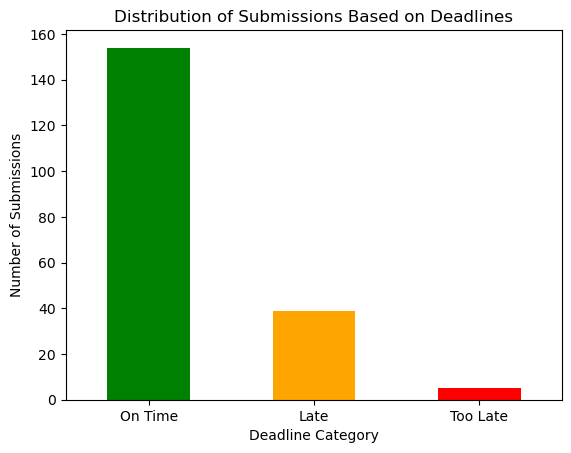

In [97]:
import matplotlib.pyplot as plt

# Plot bar chart
submission_distribution.plot(kind="bar", color=["green", "orange", "red"])
plt.xlabel("Deadline Category")
plt.ylabel("Number of Submissions")
plt.title("Distribution of Submissions Based on Deadlines")
plt.xticks(ticks=[0, 1, 2], labels=["On Time", "Late", "Too Late"], rotation=0)
plt.show()

In [98]:
import pandas as pd

# Convert submit_time to datetime format
df_exam_sub["submit_time"] = pd.to_datetime(df_exam_sub["submit_time"], format="%m/%d/%y-%H:%M:%S")

# Define deadline timestamps
deadline_1 = pd.Timestamp("2017-01-03 23:59:59")  # Deadline for dead_line=1
deadline_2 = pd.Timestamp("2017-01-09 23:59:59")  # Deadline for dead_line=2

# Ensure 'time_delay' column is float
df_exam_sub["time_delay"] = 0.0  

# Calculate time delay in hours
df_exam_sub.loc[df_exam_sub["dead_line"] == 1, "time_delay"] = (
    (df_exam_sub["submit_time"] - deadline_1).dt.total_seconds() / 3600
)
df_exam_sub.loc[df_exam_sub["dead_line"] == 2, "time_delay"] = (
    (df_exam_sub["submit_time"] - deadline_2).dt.total_seconds() / 3600
)

# Calculate average time delay for each category
average_delay_1 = df_exam_sub[df_exam_sub["dead_line"] == 1]["time_delay"].mean()
average_delay_2 = df_exam_sub[df_exam_sub["dead_line"] == 2]["time_delay"].mean()

print(f"Average time delay for dead_line=1: {average_delay_1:.2f} hours")
print(f"Average time delay for dead_line=2: {average_delay_2:.2f} hours")

Average time delay for dead_line=1: 91.71 hours
Average time delay for dead_line=2: 152.84 hours


In [99]:
# Distribution based on day_of_week
day_of_week_distribution = df_exam_sub["day_of_week"].value_counts()

# Distribution based on day
day_distribution = df_exam_sub["day"].value_counts().sort_index()

# Distribution based on month
month_distribution = df_exam_sub["month"].value_counts().sort_index()

# Distribution based on year
year_distribution = df_exam_sub["year"].value_counts().sort_index()

# Print the results
print("Submission Distribution by Day of the Week:")
print(day_of_week_distribution)

print("\nSubmission Distribution by Day of the Month:")
print(day_distribution)

print("\nSubmission Distribution by Month:")
print(month_distribution)

print("\nSubmission Distribution by Year:")
print(year_distribution)

Submission Distribution by Day of the Week:
day_of_week
Tuesday      124
Monday        36
Wednesday     15
Sunday         9
Friday         8
Saturday       4
Thursday       2
Name: count, dtype: int64

Submission Distribution by Day of the Month:
day
1       6
2      14
3     121
4      12
6       1
7       2
8       3
9      21
10      3
17      1
19      2
21      1
28      2
29      2
30      6
31      1
Name: count, dtype: int64

Submission Distribution by Month:
month
1     183
2       1
11      1
12     13
Name: count, dtype: int64

Submission Distribution by Year:
year
2016     14
2017    184
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10440\542967468.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_of_week_distribution.index, y=day_of_week_distribution.values, ax=axes[0, 0], palette="viridis")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10440\542967468.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_distribution.index, y=day_distribution.values, ax=axes[0, 1], palette="coolwarm")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10440\542967468.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_distri

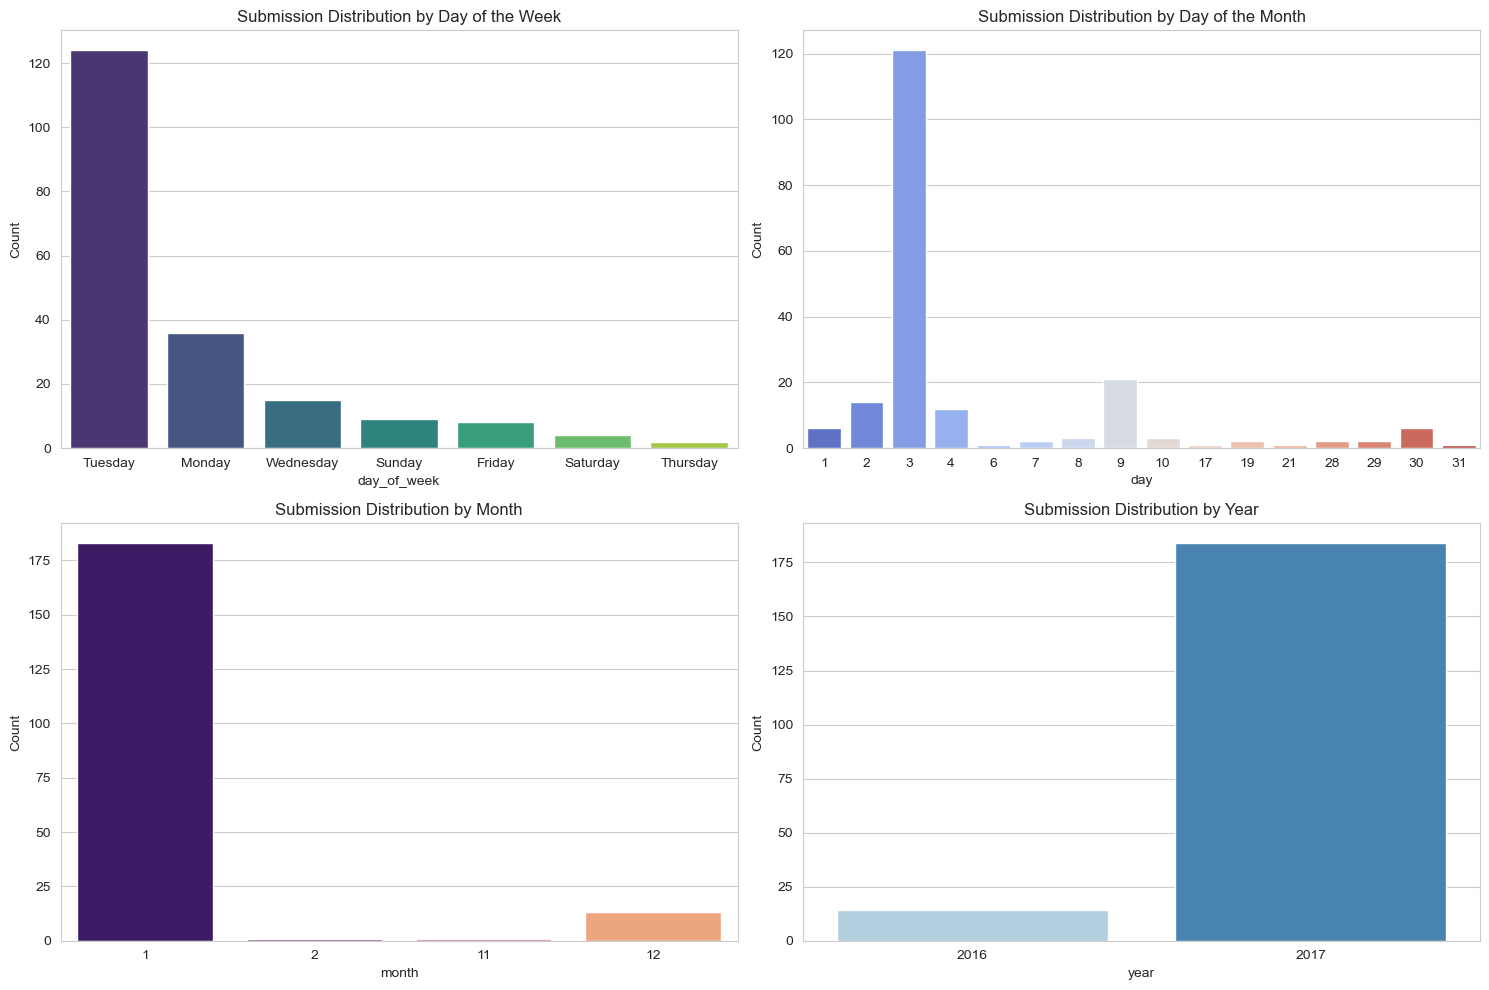

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Day of the Week Plot
sns.barplot(x=day_of_week_distribution.index, y=day_of_week_distribution.values, ax=axes[0, 0], palette="viridis")
axes[0, 0].set_title("Submission Distribution by Day of the Week")
axes[0, 0].set_ylabel("Count")

# Day Plot
sns.barplot(x=day_distribution.index, y=day_distribution.values, ax=axes[0, 1], palette="coolwarm")
axes[0, 1].set_title("Submission Distribution by Day of the Month")
axes[0, 1].set_ylabel("Count")

# Month Plot
sns.barplot(x=month_distribution.index, y=month_distribution.values, ax=axes[1, 0], palette="magma")
axes[1, 0].set_title("Submission Distribution by Month")
axes[1, 0].set_ylabel("Count")

# Year Plot
sns.barplot(x=year_distribution.index, y=year_distribution.values, ax=axes[1, 1], palette="Blues")
axes[1, 1].set_title("Submission Distribution by Year")
axes[1, 1].set_ylabel("Count")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

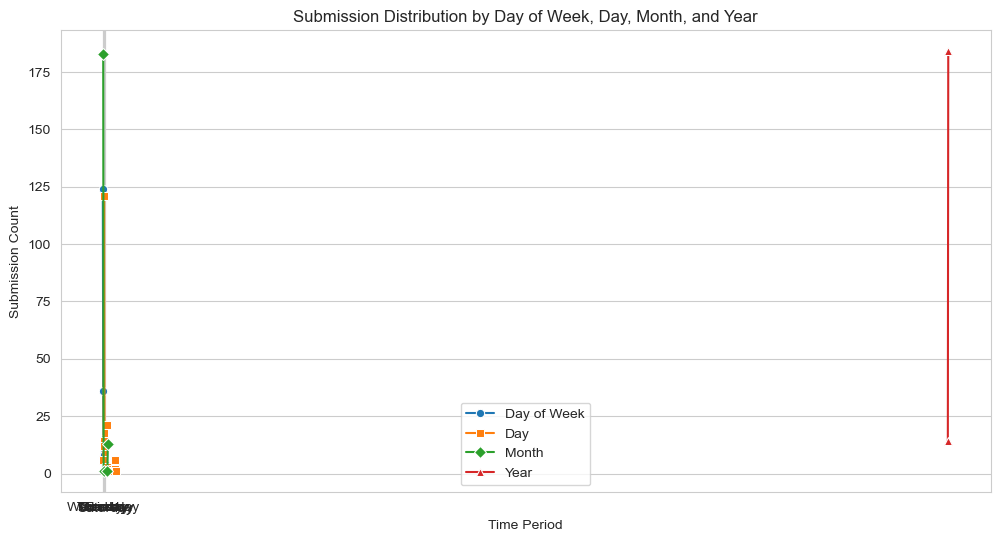

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create figure and axis
plt.figure(figsize=(12, 6))

# Plot Submission Distribution
sns.lineplot(x=day_of_week_distribution.index, y=day_of_week_distribution.values, label="Day of Week", marker='o')
sns.lineplot(x=day_distribution.index, y=day_distribution.values, label="Day", marker='s')
sns.lineplot(x=month_distribution.index, y=month_distribution.values, label="Month", marker='D')
sns.lineplot(x=year_distribution.index, y=year_distribution.values, label="Year", marker='^')

# Labels and Title
plt.xlabel("Time Period")
plt.ylabel("Submission Count")
plt.title("Submission Distribution by Day of Week, Day, Month, and Year")
plt.legend()

# Show Plot
plt.show()

In [102]:
# Count total submissions
total_submissions = len(df_exam_sub)

# Count .zip submissions
zip_submissions = df_exam_sub[df_exam_sub["submission"].str.endswith(".zip")]

# Calculate percentage
zip_percentage = (len(zip_submissions) / total_submissions) * 100

print(f"Percentage of students who submitted in .zip format: {zip_percentage:.2f}%")

Percentage of students who submitted in .zip format: 95.45%


In [103]:
# Count the number of submissions per date
submission_counts = df_exam_sub["date"].value_counts()

# Find the date with the highest number of submissions
most_common_date = submission_counts.idxmax()
max_submissions = submission_counts.max()

print(f"The highest number of submissions ({max_submissions}) occurred on {most_common_date}.")

The highest number of submissions (120) occurred on 2017-01-03.


In [104]:
# Count submissions per hour
hourly_submission_counts = df_exam_sub["submit_time"].dt.hour.value_counts()

# Find the hour with the most submissions
most_common_hour = hourly_submission_counts.idxmax()
max_submissions = hourly_submission_counts.max()

print(f"The highest number of submissions ({max_submissions}) occurred at {most_common_hour}:00 hours.")

The highest number of submissions (66) occurred at 23:00 hours.


In [105]:
# Define time categories
time_bins = {
    "8 AM - 11 AM": list(range(8, 12)),
    "12 Noon - 4 PM": list(range(12, 17)),
    "After 8 PM": list(range(20, 24)) + [0, 1, 2, 3, 4, 5, 6, 7],
}

# Count submissions in each time range
submission_counts = {label: df_exam_sub[df_exam_sub["submit_time"].dt.hour.isin(hours)].shape[0] for label, hours in time_bins.items()}

# Find the time period with the highest submissions
max_time_period = max(submission_counts, key=submission_counts.get)

# Print results
print("Submission counts per time period:", submission_counts)
print(f"\nMost submissions occurred during: {max_time_period}")

Submission counts per time period: {'8 AM - 11 AM': 6, '12 Noon - 4 PM': 21, 'After 8 PM': 159}

Most submissions occurred during: After 8 PM


In [106]:
# Count students who submitted after the first deadline (dead_line > 0)
late_submissions = df_exam_sub[df_exam_sub["dead_line"] > 0].shape[0]

print(f"Number of students who submitted after the first deadline: {late_submissions}")

Number of students who submitted after the first deadline: 44
